In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression, make_swiss_roll
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR

In [2]:
df = pd.read_csv(r'C:\Users\nnoar\OneDrive\Desktop\homework\Machine_Learning_Group_Prjoect\Resources\great_lakes.csv')
df.head()
df = df.drop(['sqfeet','lat','long','comes_furnished','cats_allowed','dogs_allowed','electric_vehicle_charge'],axis=1)

In [3]:
df = df.drop(['smoking_allowed','wheelchair_access','region'],axis=1)

In [ ]:
##ohio_df = df

In [6]:
df.head()
df_dummies = pd.get_dummies(df,drop_first=True)
df_dummies.head()
df_dummies.columns

Index(['price', 'beds', 'baths', 'type_condo', 'type_cottage/cabin',
       'type_duplex', 'type_flat', 'type_house', 'type_in-law', 'type_loft',
       'type_manufactured', 'type_townhouse',
       'laundry_options_laundry on site', 'laundry_options_no laundry on site',
       'laundry_options_w/d hookups', 'laundry_options_w/d in unit',
       'parking_options_carport', 'parking_options_detached garage',
       'parking_options_no parking', 'parking_options_off-street parking',
       'parking_options_street parking', 'parking_options_valet parking',
       'state_in', 'state_mi', 'state_mn', 'state_ny', 'state_oh', 'state_pa',
       'state_wi', 'sqfeet_binned_1000 - 2000', 'sqfeet_binned_2000 - 3000',
       'sqfeet_binned_500 - 1000'],
      dtype='object')

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90)
df_pca = pca.fit_transform(df_dummies.drop('price',axis=1))
df_pca.shape

(52049, 14)

In [216]:
df_pca.shape
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(df_pca)

In [217]:
##df_2 = pd.DataFrame(data=df_pca,columns=['1','2','3','4','5','6'])
tsne_features.shape

(52049, 2)

In [204]:
##pca.explained_variance_ratio_.sum()
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(df_dummies.drop('price',axis=1),df_dummies['price'])
lda_df = lda.transform(df_dummies.drop('price',axis=1))

In [205]:
lda_df.shape

(52049, 31)

In [26]:
X = df_dummies.drop('price',axis=1)
y = df_dummies['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [27]:
def test_model(model, data):
     X_train, X_test, y_train, y_test = data
     reg = model.fit(X_train, y_train)
     print(f'Model: {type(reg).__name__}')
     print(f'Train score: {reg.score(X_train, y_train)}')
     print(f'Test Score: {reg.score(X_test, y_test)}\n')
     plt.show() 
data = X_train,X_test,y_train,y_test 

In [28]:
test_model(GradientBoostingRegressor(), data)

Model: GradientBoostingRegressor
Train score: 0.1078994139098276
Test Score: -0.07175470371595427



In [29]:
test_model(LinearRegression(),data)
test_model(KNeighborsRegressor(),data)
test_model(RandomForestRegressor(), data)
test_model(ExtraTreesRegressor(), data)
##test_model(GradientBoostingRegressor(), data)


Model: LinearRegression
Train score: 0.03272640687453765
Test Score: 0.09204401599916112

Model: KNeighborsRegressor
Train score: 0.09194519493971531
Test Score: -0.17692436473824014

Model: RandomForestRegressor
Train score: 0.14480172686828496
Test Score: -0.14180997949222207

Model: ExtraTreesRegressor
Train score: 0.14758327760345846
Test Score: -0.12485002094909481



In [30]:
test_model(Ridge(),data)

Model: Ridge
Train score: 0.03272640646091407
Test Score: 0.09204485082474889



In [19]:
tree = RandomForestRegressor(n_estimators=500)
tree.fit(X_train_scaled,y_train)

RandomForestRegressor(n_estimators=500)

In [20]:
tree.score(X_train_scaled,y_train)

0.14262578305297813

In [203]:
feature_importances = tree.feature_importances_
features = sorted(zip(X.columns, tree.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,200)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [9]:
regressor = KNeighborsRegressor()
regressor.fit(X_train_scaled,y_train)

KNeighborsRegressor()

In [10]:
y_pred = regressor.predict(X_test_scaled)
pred_df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [48]:
pred_df

,Actual,Predicted
22468,1993,2371.0
2942,595,590.0
33818,810,727.0
1907,1150,1120.0
35285,745,745.0
...,...,...
39262,810,777.2
9396,429,426.6
31848,880,1200.0
18759,749,949.0


k: 1, Train/Test Score: 1.000/0.783
k: 3, Train/Test Score: 0.959/0.697
k: 5, Train/Test Score: 0.936/0.778
k: 7, Train/Test Score: 0.919/0.824
k: 9, Train/Test Score: 0.903/0.868
k: 11, Train/Test Score: 0.887/0.898
k: 13, Train/Test Score: 0.871/0.920
k: 15, Train/Test Score: 0.855/0.931
k: 17, Train/Test Score: 0.839/0.936
k: 19, Train/Test Score: 0.816/0.939


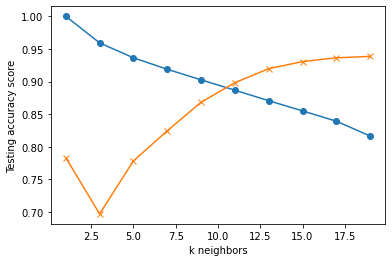

In [12]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()

In [13]:
regressor = KNeighborsRegressor(n_neighbors=11)
regressor.fit(X_train_scaled,y_train)

KNeighborsRegressor(n_neighbors=11)

In [16]:
y_true = y_test
y_pred = regressor.predict(X_test_scaled)

In [18]:
y_pred = regressor.predict(X_test_scaled)
pred_df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [20]:
print('k=11 Test Acc: %.3f' % regressor.score(X_test_scaled, y_test))

k=11 Test Acc: 0.898


In [19]:
pred_df

,Actual,Predicted
22468,1993,2323.090909
2942,595,666.272727
33818,810,703.181818
1907,1150,1218.181818
35285,745,745.000000
...,...,...
39262,810,752.818182
9396,429,453.727273
31848,880,1044.090909
18759,749,976.272727


In [19]:
# # X = df_dummies.drop('price',axis=1)
# y = df_dummies['price']
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.fit_transform(X_test)
# def test_model(model, data):
#     X_train_scaled, X_test_scaled, y_train, y_test = data
#     reg = model.fit(X_train_scaled, y_train)
#     print(f'Model: {type(reg).__name__}')
#     print(f'Train score: {reg.score(X_train_scaled, y_train)}')
#     print(f'Test Score: {reg.score(X_test_scaled, y_test)}\n')
#     plt.show() 
# data = X_train_scaled,X_test_scaled,y_train,y_test

In [20]:
#test_model(LinearRegression(),data)

In [21]:
#test_model(KNeighborsRegressor(),data)

In [22]:
#test_model(RandomForestRegressor(),data)